In [1]:
import pandas as pd
import mysql.connector

# Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="1234",
    database="phonepe"
)

# Read data
query = "SELECT * FROM map_insurance;"
df_map_insurance = pd.read_sql(query, conn)
conn.close()

# Show sample
print(df_map_insurance.head())
print(df_map_insurance.info())


   id  year  quarter                      state  \
0   1  2020        2  andaman-&-nicobar-islands   
1   2  2020        2  andaman-&-nicobar-islands   
2   3  2020        3  andaman-&-nicobar-islands   
3   4  2020        3  andaman-&-nicobar-islands   
4   5  2020        3  andaman-&-nicobar-islands   

                            district  insurance_count  insurance_amount  
0             south andaman district                3             795.0  
1                  nicobars district                3             565.0  
2  north and middle andaman district                1             281.0  
3             south andaman district               35           13651.0  
4                  nicobars district                5            1448.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3621 entries, 0 to 3620
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3621 non-null   int64  
 1

C:\Users\sharan\AppData\Local\Temp\ipykernel_35476\340688167.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_map_insurance = pd.read_sql(query, conn)


In [2]:
# Check nulls
print(df_map_insurance.isnull().sum())

# Check data types
print(df_map_insurance.dtypes)

# Check unique states and years
print(df_map_insurance['state'].unique())
print(df_map_insurance['year'].unique())


id                  0
year                0
quarter             0
state               0
district            0
insurance_count     0
insurance_amount    0
dtype: int64
id                    int64
year                  int64
quarter               int64
state                object
district             object
insurance_count       int64
insurance_amount    float64
dtype: object
['andaman-&-nicobar-islands' 'andhra-pradesh' 'arunachal-pradesh' 'assam'
 'bihar' 'chandigarh' 'chhattisgarh' 'dadra-&-nagar-haveli-&-daman-&-diu'
 'delhi' 'goa' 'gujarat' 'haryana']
[2020 2021 2022 2023 2024]


In [3]:
# Check for nulls and basic stats
print(df_map_insurance.isnull().sum())
print(df_map_insurance.describe())

# Unique values check
print("Years:", df_map_insurance['year'].unique())
print("Quarters:", df_map_insurance['quarter'].unique())
print("States:", df_map_insurance['state'].nunique())
print("Districts:", df_map_insurance['district'].nunique())


id                  0
year                0
quarter             0
state               0
district            0
insurance_count     0
insurance_amount    0
dtype: int64
               id         year      quarter  insurance_count  insurance_amount
count  3621.00000  3621.000000  3621.000000      3621.000000      3.621000e+03
mean   1811.00000  2022.124551     2.589616       837.950566      1.075652e+06
std    1045.43699     1.389068     1.087875      1481.661878      1.950745e+06
min       1.00000  2020.000000     1.000000         1.000000      3.200000e+01
25%     906.00000  2021.000000     2.000000        82.000000      7.956100e+04
50%    1811.00000  2022.000000     3.000000       289.000000      3.799580e+05
75%    2716.00000  2023.000000     4.000000       877.000000      1.117880e+06
max    3621.00000  2024.000000     4.000000     18268.000000      2.516510e+07
Years: [2020 2021 2022 2023 2024]
Quarters: [2 3 4 1]
States: 12
Districts: 252


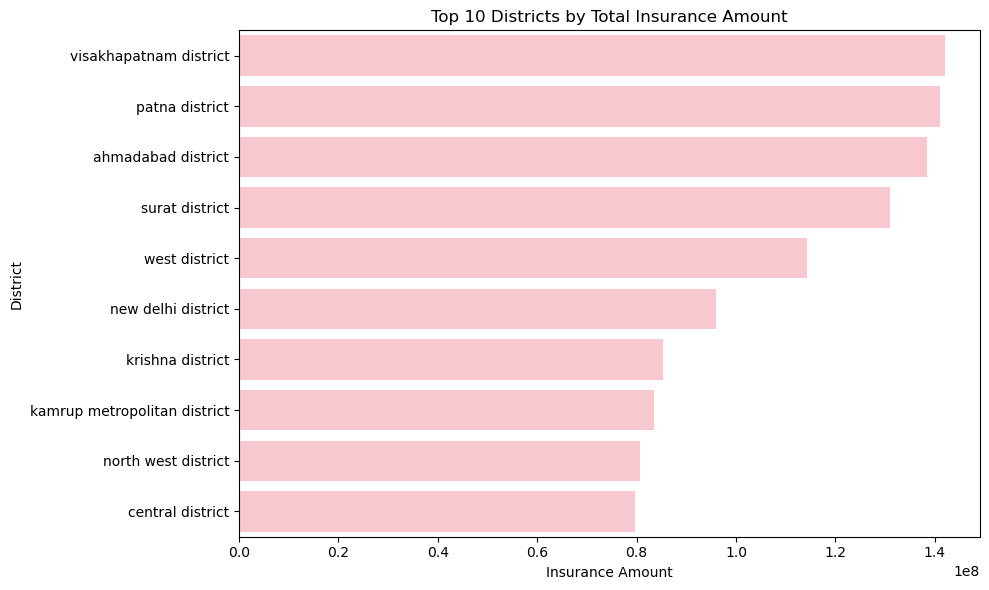

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

top_districts = df_map_insurance.groupby('district')['insurance_amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_districts.values, y=top_districts.index, color='pink')
plt.title("Top 10 Districts by Total Insurance Amount")
plt.xlabel("Insurance Amount")
plt.ylabel("District")
plt.tight_layout()
plt.savefig("C:/Users/sharan/Documents/phonepe_transaction_insights/images/top_districts_insurance_amount.png", dpi=300)
plt.show()


### INSIGHTS:
- Visakhapatnam, Patna, and Ahmedabad dominate, with nearly similar high insurance amounts whereas districts like Central and North West contribute the least.
- The insurance market is concentrated in a few urban and industrial districts, hinting at regional economic influence. 

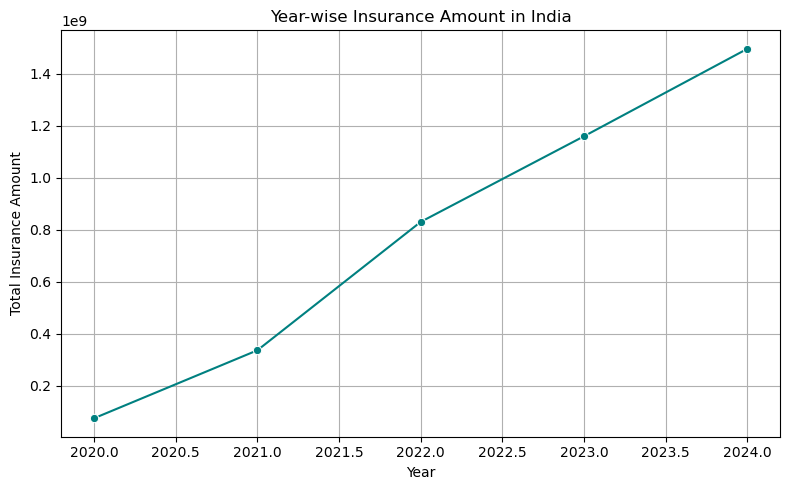

In [5]:
yearly_trend = df_map_insurance.groupby('year')['insurance_amount'].sum()

plt.figure(figsize=(8, 5))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker='o', color='teal')
plt.title("Year-wise Insurance Amount in India")
plt.xlabel("Year")
plt.ylabel("Total Insurance Amount")
plt.grid(True)
plt.tight_layout()
plt.savefig("C:/Users/sharan/Documents/phonepe_transaction_insights/images/year_wise_insurance_amount.png", dpi=300)

plt.show()


### INSIGHTS:
- A steady and strong upward trend is visible from 2020 to 2024. Insurance penetration and adoption have grown significantly, possibly reflecting rising awareness, regulatory push, or economic recovery.

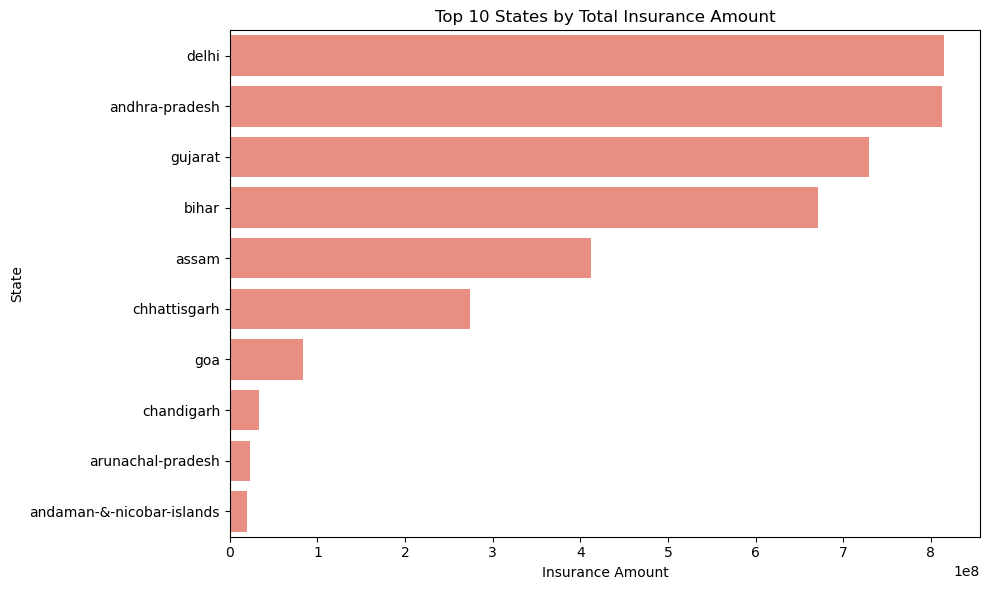

In [22]:
top_states = df_map_insurance.groupby('state')['insurance_amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.values, y=top_states.index, color='salmon')
plt.title("Top 10 States by Total Insurance Amount")
plt.xlabel("Insurance Amount")
plt.ylabel("State")
plt.tight_layout()
plt.savefig("C:/Users/sharan/Documents/phonepe_transaction_insights/images/top-states_total_insurance.png", dpi=300)
plt.show()


### INSIGHTS:
- Delhi and Andhra Pradesh show strong numbers while states like Goa, Chandigarh, and Andaman & Nicobar Islands have much lower totals.
- There’s a stark disparity in insurance activity across states, with metros and large states contributing disproportionately.

C:\Users\sharan\AppData\Local\Temp\ipykernel_35476\2615822365.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quarterly_trend.index, y=quarterly_trend.values, palette='coolwarm')


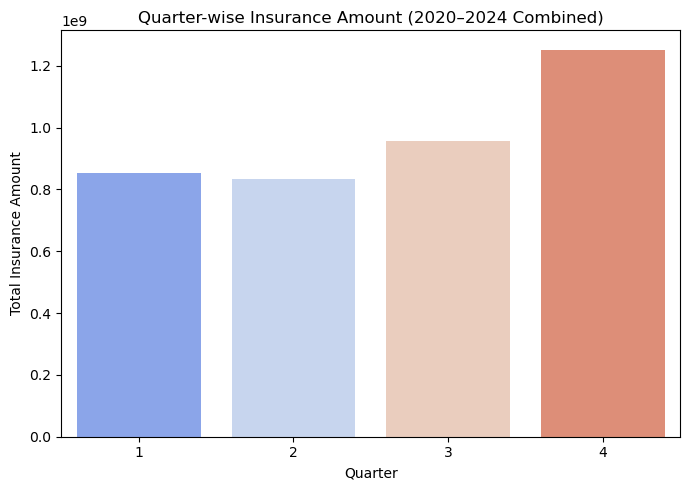

In [30]:
quarterly_trend = df_map_insurance.groupby('quarter')['insurance_amount'].sum().sort_index()

plt.figure(figsize=(7, 5))
sns.barplot(x=quarterly_trend.index, y=quarterly_trend.values, palette='coolwarm')
plt.title("Quarter-wise Insurance Amount (2020–2024 Combined)")
plt.xlabel("Quarter")
plt.ylabel("Total Insurance Amount")
plt.tight_layout()
plt.savefig("C:/Users/sharan/Documents/phonepe_transaction_insights/images/quarter_wise_insurance.png", dpi=300)
plt.show()


### INSIGHTS:
- Q4 consistently records the highest insurance amount, significantly surpassing other quarters.
- Q1 and Q2 are the lowest, with Q2 slightly under Q1.
- Insurance activity peaks towards year-end (Q4), likely driven by financial year closure, tax planning, or seasonal demand.

## FINAL TAKEAWAY: 
- From 2020 to 2024, India’s insurance sector has shown steady and significant growth. Yearly insurance amounts have increased consistently, reflecting greater insurance adoption, possibly driven by rising awareness, regulatory initiatives, and economic recovery.
- Quarterly analysis highlights that insurance activity peaks in the fourth quarter, indicating strong seasonal or fiscal influences, such as year-end financial planning and tax-related decisions.
- Geographically, insurance amounts are highly concentrated in a few states and districts, with Delhi, Andhra Pradesh, Visakhapatnam, Patna, and Ahmedabad leading the way. This suggests that while the market is growing, there is substantial scope to expand insurance penetration in less represented regions.
- Overall, the data points to a positive trajectory for the insurance sector, with opportunities to address regional imbalances and reduce reliance on seasonal spikes.